In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
columns = ['01_annual_mean_temp','02_mean_diurnal_range','07_temp_annual_range','12_annual_precipitation']

In [25]:
dataframe = pd.read_parquet("generated_files/bio_variables_dataframe_occurence_and_abscence.parquet")

In [27]:
dataframe['presence'].value_counts()

presence
1    2847
0    2383
Name: count, dtype: int64

In [12]:
max_entropy_model = LogisticRegression(max_iter=1000)

In [22]:
X = dataframe.iloc[:,3:]
y = dataframe['presence']

In [14]:
# ROC 
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

Max Entropy 5-fold Cross Validation Accuracy: 6.62 (+/- 2.12)

Accuracy Score: 0.20

Classification report
              precision    recall  f1-score   support

           0       0.20      1.00      0.33       176
           1       0.00      0.00      0.00       712

    accuracy                           0.20       888
   macro avg       0.10      0.50      0.17       888
weighted avg       0.04      0.20      0.07       888


Confussion matrix
[[176   0]
 [712   0]]

AUC(ROC): 0.50



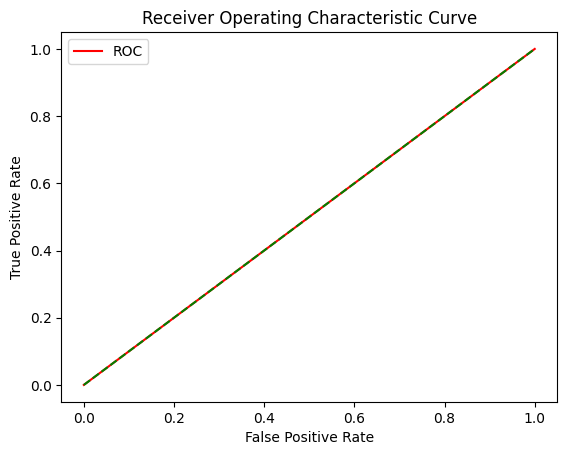

In [24]:
X_train, X_test, y_train, y_true = model_selection.train_test_split(
    X, y,
        test_size=.25, # Test data size
        shuffle=True, # Shuffle the data before split
        stratify=y # Keeping the appearance/non-appearance ratio of Y
    )

if True: # Cross-validation
    kf = model_selection.KFold(n_splits=5) # k-fold
    scores = model_selection.cross_val_score(max_entropy_model, X_train, y_train, cv=kf, scoring='f1_weighted')
    print("Max Entropy" + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
            % (5, scores.mean() * 100, scores.std() * 200))
    print()

max_entropy_model.fit(X_train, y_train) # Training of classifiers
y_pred = max_entropy_model.predict(X_test) # Classifier predictions

# Classifier evaluation metrics
print("Accuracy Score: %.2f" % metrics.accuracy_score(y_true, y_pred))
print()

print("Classification report")
print(metrics.classification_report(y_true, y_pred))
print()

print("Confussion matrix")
print(metrics.confusion_matrix(y_true, y_pred))
print()

print('AUC(ROC): %.2f'% metrics.roc_auc_score(y_true, y_pred))
print()
    
# ROC 
probs = max_entropy_model.predict_proba(X_test) 
prob = probs[:, 1]  
fper, tper, thresholds = metrics.roc_curve(y_true, prob)
plot_roc_curve(fper, tper)
